In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Training Data

In [3]:
x_train = pd.read_csv("/content/drive/MyDrive/Datasets/Capstone/train_approach2.csv")

In [4]:
x_train.shape

(6696, 127)

In [5]:
x_train = x_train.iloc[: , :-1].to_numpy()
x_train.shape

(6696, 126)

Importing Testing Data

In [6]:
x_test = pd.read_csv("/content/drive/MyDrive/Datasets/Capstone/test_approach2.csv")

In [7]:
x_test.shape

(1674, 127)

In [8]:
x_test = x_test.iloc[: , :-1].to_numpy()
x_test.shape

(1674, 126)

In [9]:
train_y = []
for i in range(0,216):
  train_y = np.append(train_y,1).astype(int)
for i in range(0,216):
  train_y = np.append(train_y,2).astype(int)
for i in range(0,216):
  train_y = np.append(train_y,3).astype(int)
for i in range(0,216):
  train_y = np.append(train_y,4).astype(int)
for i in range(0,216):
  train_y = np.append(train_y,5).astype(int)
for i in range(0,216):
  train_y = np.append(train_y,6).astype(int)
for i in range(0,216):
  train_y = np.append(train_y,7).astype(int)
for i in range(0,216):
  train_y = np.append(train_y,8).astype(int)
for i in range(0,216):
  train_y = np.append(train_y,9).astype(int)

In [10]:
train_y.shape

(1944,)

In [ ]:
test_y = []
for i in range(0,54):
  test_y = np.append(test_y,1).astype(int)
for i in range(0,54):
  test_y = np.append(test_y,2).astype(int)
for i in range(0,54):
  test_y = np.append(test_y,3).astype(int)
for i in range(0,54):
  test_y = np.append(test_y,4).astype(int)
for i in range(0,54):
  test_y = np.append(test_y,5).astype(int)
for i in range(0,54):
  test_y = np.append(test_y,6).astype(int)
for i in range(0,54):
  test_y = np.append(test_y,7).astype(int)
for i in range(0,54):
  test_y = np.append(test_y,8).astype(int)
for i in range(0,54):
  test_y = np.append(test_y,9).astype(int)
test_y.shape

(486,)

Reshaping Training Data

In [12]:
x_train = x_train.reshape(216,31,126)
x_train.shape

(216, 31, 126)

In [13]:
train_y = train_y.reshape(216,9)
train_y.shape

(216, 9)

Reshaping Testing Data

In [14]:
x_test = x_test.reshape(54,31,126)
x_test.shape

(54, 31, 126)

In [15]:
test_y = test_y.reshape(54,9)
test_y.shape

(54, 9)

Model Generation

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import TensorBoard

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
def create_model():
  max_len=31
  feature_len=126
  classes_len= 216 # len(x_train)
  model = Sequential()
  model.add(LSTM(256, return_sequences=True, input_shape=(max_len, feature_len)))
  model.add(Dropout(0.25))
  model.add(LSTM(256, return_sequences=True))
  model.add(Dropout(0.25))
  model.add(LSTM(128, return_sequences=False))
  model.add(Dense(64))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(9, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
model_11 = create_model()
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 31, 256)           392192    
                                                                 
 dropout (Dropout)           (None, 31, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 31, 256)           525312    
                                                                 
 dropout_1 (Dropout)         (None, 31, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 batch_normalization (BatchN  (None, 64)               2

In [19]:
import os
import tensorflow

In [20]:
checkpoint_path = "training_6/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model_11.fit(x_train, train_y,
          epochs=10,
          validation_data=(x_test, test_y),
          callbacks=[cp_callback])  # Pass callback to training

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 110.9289 - accuracy: 0.5694
Epoch 1: saving model to training_6/cp.ckpt
7/7 [==============================] - 19s 795ms/step - loss: 110.9289 - accuracy: 0.5694 - val_loss: 100.5029 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - ETA: 0s - loss: 113.4731 - accuracy: 0.6574
Epoch 2: saving model to training_6/cp.ckpt
7/7 [==============================] - 4s 522ms/step - loss: 113.4731 - accuracy: 0.6574 - val_loss: 101.8845 - val_accuracy: 0.5926
Epoch 3/10
7/7 [==============================] - ETA: 0s - loss: 114.0619 - accuracy: 0.6898
Epoch 3: saving model to training_6/cp.ckpt
7/7 [==============================] - 3s 425ms/step - loss: 114.0619 - accuracy: 0.6898 - val_loss: 100.2172 - val_accuracy: 0.3704
Epoch 4/10
7/7 [==============================] - ETA: 0s - loss: 117.0965 - accuracy: 0.5324
Epoch 4: saving model to training_6/cp.ckpt
7/7 [==============================] - 3s 412ms/

In [21]:
# Actual Model
model_11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loss, acc = model_11.evaluate(x_test, test_y, verbose=2)
print("Actual Model, accuracy: {:5.2f}%".format(100 * acc))

2/2 - 3s - loss: 101.4016 - accuracy: 0.6111 - 3s/epoch - 2s/step
Actual Model, accuracy: 61.11%


In [22]:
model_json = model_11.to_json()
with open("model_11.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_11.save_weights("model_11.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
test_y = 

In [23]:
from tensorflow.keras.models import model_from_json

In [24]:
json_file = open('model_11.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_11.h5")
print("Loaded model from disk")

Loaded model from disk


In [25]:
# Re-evaluate the model
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loss, acc = loaded_model.evaluate(x_test, test_y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

2/2 - 3s - loss: 101.4016 - accuracy: 0.6111 - 3s/epoch - 1s/step
Restored model, accuracy: 61.11%


In [26]:
res = loaded_model.predict(x_test)

2/2 [==============================] - 2s 75ms/step


In [27]:
actions = ['1','2','3','4','5','6','7','8','9']

In [28]:
predicted_output = []
for i in range(0,54):
  print(actions[np.argmax(res[i])])
  predicted_output.append(actions[np.argmax(res[i])])

4
4
1
4
4
4
4
4
4
4
4
4
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
9
9
9
9
9
3
9
3


In [29]:
from matplotlib import pyplot

In [30]:
lst2 = [item[0] for item in test_y]

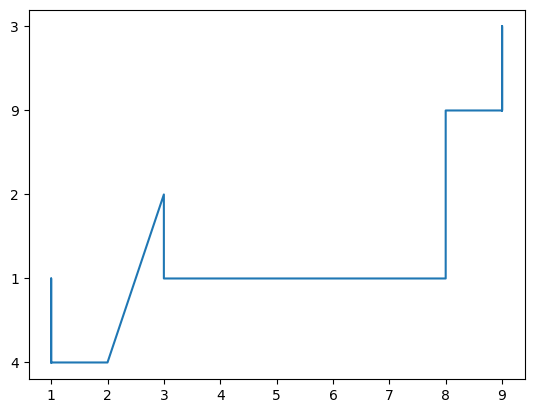

In [31]:
pyplot.plot(lst2, predicted_output)
pyplot.show()